## Q1. What is the purpose of grid search cv in machine learning, and how does it work?

Grid search cross-validation (GridSearchCV) is a technique used in machine learning to systematically search for the best combination of hyperparameters for a given machine learning model. Hyperparameters are settings or configurations that are not learned from the data but are set prior to training the model. Examples of hyperparameters include the learning rate in a gradient boosting algorithm, the number of hidden layers and units in a neural network, or the kernel type and regularization strength in a support vector machine.

The purpose of GridSearchCV is to automate the process of finding the best hyperparameters by searching through a predefined grid of possible hyperparameter values. It works by performing the following steps:

Define the Model: First, you need to specify the machine learning model you want to use, along with a range of perparameter values that you want to search through.

Define the Grid: Create a grid of hyperparameter values to search. This is essentially a dictionary where each perparameter is associated with a list of values you want to try.

Cross-Validation: Divide your training data into several subsets (folds). GridSearchCV will perform cross-validation by training and evaluating the model multiple times, each time using a different combination of hyperparameters and a different subset of the data for validation. The results are averaged to provide a more robust assessment of the model's performance.

Model Evaluation: For each combination of hyperparameters, GridSearchCV calculates a performance metric (such as accuracy, F1-score, or mean squared error) based on the cross-validation results. This metric is typically defined when setting up GridSearchCV.

Select the Best Hyperparameters: GridSearchCV identifies the combination of hyperparameters that yielded the best performance metric score. This combination is considered the optimal set of hyperparameters for your model.

Train the Model with Best Hyperparameters: Once the best hyperparameters are identified, you can train the final model using the entire training dataset with these optimal hyperparameters.

Grid search is an exhaustive search method, which means it tests all possible combinations of hyperparameters specified in the grid. While it guarantees that you will find the best hyperparameters within the specified grid, it can be computationally expensive, especially when the grid is large. To mitigate this, other methods like RandomizedSearchCV can be used to search over a random subset of hyperparameters, which can be more efficient in certain cases.

## Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

Grid search cross-validation (GridSearchCV) and randomized search cross-validation (RandomizedSearchCV) are both techniques used to search for the best hyperparameters for a machine learning model. However, they differ in how they explore the hyperparameter space and their computational efficiency.

Grid Search Cross-Validation (GridSearchCV):

1. Search Strategy: GridSearchCV performs an exhaustive search over all possible combinations of hyperparameters specified in a predefined grid. It systematically evaluates every combination.

2. Computationally Expensive: Grid search can be computationally expensive, especially when the hyperparameter space is large. It's suitable when you have a relatively small number of hyperparameters and discrete choices for each hyperparameter.

3. Deterministic: Grid search is deterministic, meaning it will always explore the same combinations of hyperparameters if given the same grid and dataset.

4. Complete Search: It guarantees that the best hyperparameters within the specified grid will be found.


Randomized Search Cross-Validation (RandomizedSearchCV):

1. Search Strategy: RandomizedSearchCV, as the name suggests, explores the hyperparameter space randomly. Instead of evaluating all possible combinations, it samples a specified number of combinations from the hyperparameter space.

2. Computational Efficiency: Randomized search is computationally more efficient compared to grid search because it doesn't exhaustively evaluate all combinations. It's suitable when you have a large hyperparameter space or limited computational resources.

3. Random Sampling: Since it samples hyperparameters randomly, it doesn't guarantee that the best hyperparameters will be found, but it has a higher chance of finding good ones compared to a purely random search.

4. Variability: Randomized search introduces randomness into the hyperparameter search process, so the results may vary slightly between different runs. However, this randomness can be controlled by setting a random seed for reproducibility.

When to Choose One Over the Other:

1. Grid Search: 
   - Use grid search when you have a small number of hyperparameters and discrete choices for each hyperparameter.
   - When you have enough computational resources to evaluate all combinations.
   - When you want to ensure a complete and exhaustive search of the hyperparameter space.

2. Randomized Search:
   - Choose randomized search when you have a large hyperparameter space or limited computational resources.
   - When you want to quickly explore a wide range of hyperparameters to get a sense of what works well without performing an exhaustive search.
   - When you are willing to accept some degree of randomness in the hyperparameter search process, as long as you have mechanisms to control the randomness (e.g., by setting a random seed).

In practice, randomized search is often preferred over grid search due to its computational efficiency and effectiveness at finding good hyperparameters. Grid search can become impractical when dealing with a large number of hyperparameters or continuous hyperparameter spaces. However, it's essential to consider your specific problem, dataset, and available resources when choosing between these two search strategies.

## Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

Data leakage, also known as leakage, is a critical issue in machine learning that occurs when information from outside the training dataset is used to make predictions during model training or evaluation. Data leakage can lead to overly optimistic performance estimates and models that fail to generalize well to new, unseen data. It is a problem because it can result in misleadingly high model accuracy and make models appear more effective than they actually are. Data leakage can occur in various forms:

1. Train-Test Contamination: This is one of the most common types of data leakage. It happens when data from the test or validation set is inadvertently included in the training set. This can lead to the model learning patterns specific to the test set, and it will perform well on the test data but poorly on new, unseen data.

Example: Let's say you're building a spam email classifier. If some emails from your test set are mistakenly included in the training data, the model could learn to recognize those specific emails as spam, leading to inflated test accuracy. However, it won't perform well on completely new emails.


2. Temporal Leakage: Temporal leakage occurs when future information is used to predict past events. In time-series data, it's crucial to avoid using information from the future when making predictions for the past.

Example: Predicting stock prices is a common example. If you use future stock price data to predict past stock prices, your model will perform exceptionally well during training but will not be useful for actual stock predictions.

3. Target Leakage: Target leakage happens when features are included in the training data that are directly related to the target variable but wouldn't be available during actual prediction.

Example: In a credit scoring model, including the customer's future payment history as a feature is a form of target leakage. This information wouldn't be available when assessing a new loan application.

4. Data Preprocessing Leakage: It can occur when data preprocessing steps, such as feature scaling or imputation, are applied without considering the data split between training and testing. For example, if you scale the entire dataset, including the test set, based on the training set statistics, you introduce information from the test set into the training process.

Example: Standardizing or normalizing the entire dataset before splitting it into training and test sets can lead to data leakage if the scaling parameters are calculated based on the entire dataset.

Data leakage is a significant problem in machine learning because it can result in models that appear to perform well in practice but fail when deployed in real-world applications. To avoid data leakage, it's crucial to carefully handle data splits, preprocess data appropriately, and ensure that the model is making predictions based only on information that would be available at the time of prediction. Data leakage detection and prevention are critical steps in building robust and reliable machine learning models.

## Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage when building a machine learning model is essential to ensure the model's reliability and generalization to new, unseen data. Here are several strategies and best practices to prevent data leakage:

1. Split Data Carefully:
   - Separate your dataset into distinct training, validation, and test sets before any preprocessing or feature engineering. Use a typical split ratio, such as 70% for training, 15% for validation, and 15% for testing.
   - Ensure that each data point belongs to only one of these sets, and there is no overlap.

2. Feature Engineering:
   - Be cautious when creating new features. Ensure that the features are derived solely from information available up to the point of prediction.
   - Avoid using information from the target variable or the test set when creating features.
   - For time-series data, do not use future information to create features for past events.

3. Handle Missing Data Appropriately:
   - When imputing missing values, use only information available within the respective dataset (e.g., training data for imputing training data, and so on).
   - Do not impute missing values in the entire dataset at once, as this can introduce information leakage from the test set.

4. Scale and Normalize Features Properly:
   - If scaling or normalizing features, calculate the scaling parameters (e.g., mean and standard deviation) based solely on the training data and then apply the same transformation to the validation and test data.
   - Avoid calculating scaling parameters using the entire dataset, as this can introduce information from the test set into the training process.

5. Avoid Data Leakage in Cross-Validation:
   - When using cross-validation to evaluate model performance, ensure that each fold's training and validation sets are created independently to avoid any overlap or contamination.
   - Use techniques like StratifiedKFold for classification tasks to maintain class distribution in each fold.

6. Feature Selection and Importance:
   - If you use feature selection or importance ranking methods, perform these operations based only on the training data to avoid information from the validation or test sets influencing the feature selection process.

7. Target Encoding:
   - If you use target encoding for categorical variables, compute the encodings solely based on the training data and apply them consistently to the validation and test data.

8. Evaluate Models Properly:
   - When evaluating model performance, use metrics and techniques suitable for the task, such as accuracy, precision, recall, F1-score, or mean squared error, depending on the problem type.
   - Avoid evaluating the model on the test set multiple times during development, as this can lead to overfitting to the test data.

9. Documentation and Logging:
   - Maintain clear documentation of your data preprocessing steps, including any data leakage prevention measures.
   - Use logging to track all data manipulation steps and ensure they are performed correctly.

10. Continuous Monitoring:
    - After deploying the model in a production environment, continuously monitor it to detect any unexpected data leakage that might occur due to changes in data sources or preprocessing pipelines.

Preventing data leakage requires careful attention to detail at every stage of the machine learning pipeline, from data collection and preprocessing to model evaluation and deployment. By following these best practices, you can reduce the risk of data leakage and build models that are more robust and reliable.

## Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model.


The following 4 are the basic terminology which will help us in determining the metrics we are looking for.

True Positives (TP): when the actual value is Positive and predicted is also Positive.

True negatives (TN): when the actual value is Negative and prediction is also Negative.

False positives (FP): When the actual is negative but prediction is Positive. Also known as the Type 1 error

False negatives (FN): When the actual is Positive but the prediction is Negative. Also known as the Type 2 error

For a binary classification problem, we would have a 2 x 2 matrix as shown below with 4 values:

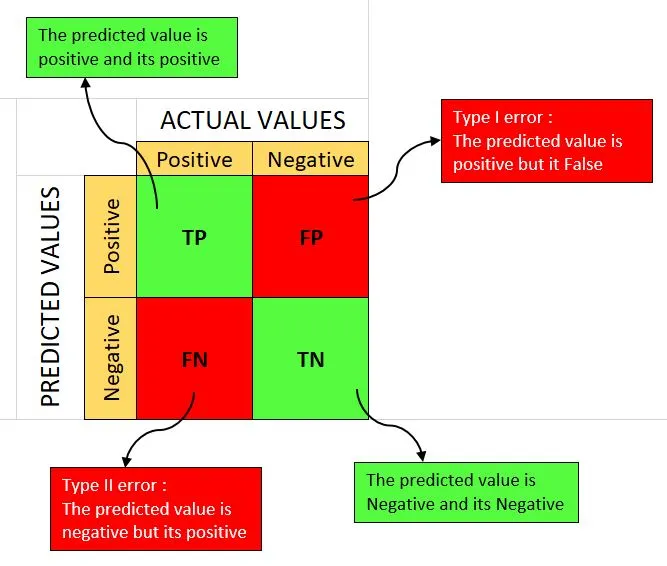

a. Accuracy,
b. Precision,
c. Recall (TPR, Sensitivity),
d. F1-Score,
e. FPR (Type I Error),
f. FNR (Type II Error)

this things also can measure from confusion metrix.


Accuracy: You can calculate the overall accuracy of the model using the formula:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

It represents the proportion of correctly classified instances out of all instances.

## Q6. Explain the difference between precision and recall in the context of a confusion matrix.

Precision (Positive Predictive Value): Precision is a measure of how many of the positive predictions made by the model were correct. It's calculated as:

Precision = TP / (TP + FP)

High precision indicates that the model doesn't make many false positive errors.


Recall (Sensitivity, True Positive Rate): Recall measures how many of the actual positive instances the model was able to correctly identify. It's calculated as:

Recall = TP / (TP + FN)

High recall indicates that the model doesn't miss many positive instances.

Whenever False Positive is much more important use Precision. High precision means that when the model predicts a positive class, it is often correct. It indicates that the model doesn't make many false positive errors.
Precision is particularly important when the cost of false positives is high. 

For example, in medical diagnosis, you want to be confident that a positive prediction for a disease is accurate because it might lead to invasive procedures or treatments.

Whenever False Negative is much more important use Recall. High recall means that the model is good at finding most of the positive instances in the dataset. It indicates that the model doesn't miss many positive instances.
Recall is particularly important when failing to identify positive instances has significant consequences. 

For example, in disease detection, you want to make sure that the model doesn't miss diagnosing individuals who actually have the disease.

## Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Interpreting a confusion matrix allows you to gain insights into the types of errors your classification model is making. By examining the values within the matrix, you can identify the specific categories of errors and understand where your model is performing well or poorly. Here's how you can interpret a confusion matrix:

Let's start with a standard confusion matrix layout:

```
              Actual Positive        Actual Negative
Predicted   | True Positives (TP)  | False Positives (FP)
---------------------------------------
Predicted   | False Negatives (FN) | True Negatives (TN)

```

1. True Positives (TP): These are cases where the model correctly predicted the positive class, and the actual labels were also positive. In medical terms, these are true positive diagnoses.

2. True Negatives (TN): These are cases where the model correctly predicted the negative class, and the actual labels were also negative. In medical terms, these are true negative diagnoses.

3. False Positives (FP) TYPE 1 Error: These are cases where the model incorrectly predicted the positive class (a false alarm), while the actual labels were negative. In medical terms, these are false positive diagnoses.

4. False Negatives (FN) TYPE 2 Error: These are cases where the model incorrectly predicted the negative class (missed a positive case), while the actual labels were positive. In medical terms, these are false negative diagnoses.

Now, let's interpret the confusion matrix to understand the types of errors your model is making:

- High TP, High TN: When you have a high number of true positives and true negatives, your model is performing well in correctly identifying both positive and negative cases.

- High TP, Low FN: High true positives and low false negatives indicate that your model is effective at capturing positive instances, minimizing the chances of missing them.

- High TN, Low FP: High true negatives and low false positives suggest that your model is good at correctly identifying negative instances and avoiding false alarms.

- High FP: A high number of false positives indicates that your model tends to predict the positive class when it should not. This can be problematic if false positives have significant consequences.

- High FN: A high number of false negatives suggests that your model tends to miss positive instances. This can be problematic if false negatives have significant consequences.

- Low TP, Low TN: Low true positives and true negatives suggest that your model is performing poorly overall, struggling to make correct predictions for both positive and negative instances.

By examining these patterns within the confusion matrix, you can make informed decisions about how to improve your model. For example:

- If your model has a high number of false positives, you might want to adjust the decision threshold or explore feature engineering to reduce these errors.

- If your model has a high number of false negatives, you may need to consider improving the model's sensitivity or recall by adjusting the threshold or collecting more data.

- If your model performs well in some aspects but poorly in others, you can fine-tune it to strike a balance between precision and recall based on the specific goals and constraints of your application.

In summary, the confusion matrix is a valuable tool for diagnosing the strengths and weaknesses of your classification model, helping you identify the types of errors it is making, and guiding you in making necessary improvements to enhance its performance.

## Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

Several common metrics can be derived from a confusion matrix to assess the performance of a classification model. These metrics provide valuable insights into how well the model is making predictions, and they help you understand the balance between true positive and true negative predictions, false positives, and false negatives. Here are some common metrics derived from a confusion matrix and their calculations:

1. Accuracy:
   
   Accuracy measures the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model.

   Accuracy = (TP + TN) / (TP + TN + FP + FN)

2. Precision (Positive Predictive Value):
   
   Precision focuses on the accuracy of positive predictions. It measures the proportion of true positive predictions out of all positive predictions made by the model.

   Precision = TP / (TP + FP)

3. Recall (Sensitivity, True Positive Rate):
   
   Recall assesses the model's ability to identify all positive instances. It measures the proportion of true positive predictions out of all actual positive instances in the dataset.

   Recall = TP / (TP + FN)

4. F1-Score:
   
   The F1-Score is the harmonic mean of precision and recall. It provides a balance between these two metrics and is useful when there is an uneven class distribution.

   F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

5. Specificity (True Negative Rate):
   
   Specificity measures the model's ability to correctly identify negative instances. It calculates the proportion of true negative predictions out of all actual negative instances.

   Specificity = TN / (TN + FP)

6. False Positive Rate (FPR):
   
   The FPR measures the proportion of false positive predictions out of all actual negative instances. It is the complement of specificity.

   FPR = FP / (TN + FP)

7. Negative Predictive Value (NPV):
   
   NPV focuses on the accuracy of negative predictions. It measures the proportion of true negative predictions out of all negative predictions made by the model.

   NPV = TN / (TN + FN)

8. False Discovery Rate (FDR):
   
   The FDR is the complement of precision. It measures the proportion of false positive predictions out of all positive predictions made by the model.

   FDR = FP / (TP + FP)

9. True Negative Rate (TNR):
   
   TNR is another term for specificity, measuring the proportion of true negative predictions out of all actual negative instances.

   TNR = TN / (TN + FP)

10. Matthews Correlation Coefficient (MCC):
   
    MCC takes into account all four values in the confusion matrix and provides a single value that represents the overall quality of a classification model.

    MCC = (TP * TN - FP * FN) / sqrt((TP + FP)(TP + FN)(TN + FP)(TN + FN))

These metrics offer various perspectives on model performance and can be used to evaluate a model's strengths and weaknesses in different contexts. The choice of metrics depends on the specific goals and constraints of your application, as well as the relative importance of true positives, true negatives, false positives, and false negatives in your problem domain.

## Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

The relationship between the accuracy of a classification model and the values in its confusion matrix can be understood by examining how the accuracy metric is calculated using the elements of the confusion matrix.

Here's the formula for accuracy:

Accuracy = (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)

Now, let's break down this relationship based on the elements of the confusion matrix:

1. True Positives (TP): These are the cases where the model correctly predicted the positive class, and the actual labels were also positive. When TP is high, it contributes positively to accuracy because these are correctly predicted positive instances.

2. True Negatives (TN): These are the cases where the model correctly predicted the negative class, and the actual labels were also negative. When TN is high, it also contributes positively to accuracy because these are correctly predicted negative instances.

3. False Positives (FP): These are the cases where the model incorrectly predicted the positive class (false alarms), while the actual labels were negative. When FP is high, it contributes negatively to accuracy because these are incorrect positive predictions.

4. False Negatives (FN): These are the cases where the model incorrectly predicted the negative class (missed positive instances), while the actual labels were positive. When FN is high, it also contributes negatively to accuracy because these are incorrect negative predictions.

In summary, accuracy measures the overall correctness of the model's predictions by considering both true positive and true negative predictions while penalizing false positives and false negatives. It provides a global assessment of the model's performance across all classes and is useful for balanced class distributions.

However, accuracy may not be the best metric in cases of imbalanced datasets, where one class significantly outweighs the other. In such situations, a high number of true negatives can dominate the accuracy calculation, making the model appear better than it actually is. In these cases, it's essential to consider additional metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) to gain a more comprehensive understanding of the model's performance, particularly its ability to correctly identify the minority class.


## Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix can be a valuable tool for identifying potential biases or limitations in your machine learning model, especially when you suspect that the model's performance may be influenced by factors like class imbalances, data quality issues, or unfair treatment of certain groups. Here's how you can use a confusion matrix to uncover such biases or limitations:

1. Class Imbalances:

   - Check the Frequency of Classes: Examine the distribution of actual classes in your dataset. If one class significantly outnumbers the other, it can lead to imbalanced accuracy metrics.

   - Analyze True Positives and True Negatives: Determine whether the model is biased towards the majority class by looking at the number of true positives and true negatives for each class. A heavily imbalanced distribution can cause the model to perform well on the majority class but poorly on the minority class.

2. False Positives and False Negatives:

   - Identify Disproportionate Errors: Look at the number of false positives and false negatives for each class. If there is a significant difference between the two, it indicates that the model may be biased towards one class, making more errors in predicting the other.

3. Bias Towards Specific Features or Groups:

   - Subgroup Analysis: If your dataset contains sensitive attributes (e.g., gender, race, age), perform a subgroup analysis by examining the confusion matrix separately for each subgroup. This can reveal whether the model performs differently for different subgroups, indicating potential bias.

   - Disparate Impact: Calculate metrics like demographic parity, equal opportunity, or disparate impact to quantify potential bias towards specific groups.

4. Threshold Effects:

   - Adjust Decision Threshold: The default decision threshold for classification is often 0.5, but it can be adjusted. Analyze how different decision thresholds affect the confusion matrix and model performance, especially precision and recall, to identify a threshold that aligns better with your goals.

5. Misclassified Instances:

   - Inspect Misclassified Instances: Examine individual instances that were misclassified by the model. This can help identify patterns or characteristics that the model struggles with, revealing potential limitations in the data or model.

6. Feature Importance Analysis:

   - Analyze Feature Importance: If your model allows for feature importance analysis (e.g., tree-based models), investigate which features contribute most to incorrect predictions. Biases may be related to specific features that the model relies on.

7. Data Quality Issues:

   - Data Preprocessing: Review your data preprocessing steps, such as handling missing values and outliers. Biases or limitations may arise from how data is cleaned or transformed.

8. Fairness Considerations:

   - Ethical Auditing: Conduct an ethical audit of your model to assess fairness and adherence to legal and ethical guidelines. Consider using fairness metrics, such as disparate impact, equal opportunity, and disparate treatment, to evaluate the model's behavior.

9. External Factors:

   - External Data Sources: Be aware of potential biases introduced by external data sources or data collection methods. Biases may originate from sources outside your control.

10. Iterative Improvement:

    - Iterate and Experiment: Continuously iterate on your model, data, and evaluation metrics to mitigate biases and limitations. Experiment with different data sampling techniques, fairness-aware algorithms, and reweighting strategies to improve model fairness and performance.

Using a combination of the techniques mentioned above, you can systematically analyze the confusion matrix to identify potential biases or limitations in your machine learning model. Addressing these issues is crucial for building fair and reliable models, especially in applications where fairness, equity, and non-discrimination are essential considerations.